In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import math
import random
from random import uniform
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures

# Exercice 1 : Binary classification using logistic regression

## Load data and inspection of the data

In [3]:
# We will load the data that is in the file 'donnees_exo1.txt'
data = pd.read_csv('donnees_exo1.txt', sep = ' ')

In [4]:
data

,X1,X2,Y
0,-0.697580,0.684940,0
1,-0.478690,0.633770,1
2,0.057028,0.918860,0
3,-0.593890,0.494880,0
4,0.229840,-0.411550,1
...,...,...,...
113,0.460250,0.012427,1
114,-0.046659,0.816520,1
115,0.322000,0.692250,1
116,-0.524770,0.209800,1


In [5]:
data.describe()

,X1,X2,Y
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646563,1.000000
max,1.070900,1.108900,1.000000


In [6]:
# We have 118 examples in the dataset
# We have 2 features X1 and X2. 
data[['Y']].value_counts()

Y
0    60
1    58
dtype: int64

In [ ]:
# Y have 60 zeros and 58 ones

In [13]:
ClassAIndices=np.where(data['Y']==0)
ClassAIndices=ClassAIndices[0].tolist()
ClassBIndices=np.where(data['Y']==1)
ClassBIndices=ClassBIndices[0].tolist()
Xs = data.loc[:, ['X1','X2']]
ys = data['Y']


In [14]:
XclassA=Xs.iloc[ClassAIndices,:]
XclassB=Xs.iloc[ClassBIndices,:]
yclassA=ys.iloc[ClassAIndices]
yclassB=ys.iloc[ClassBIndices]

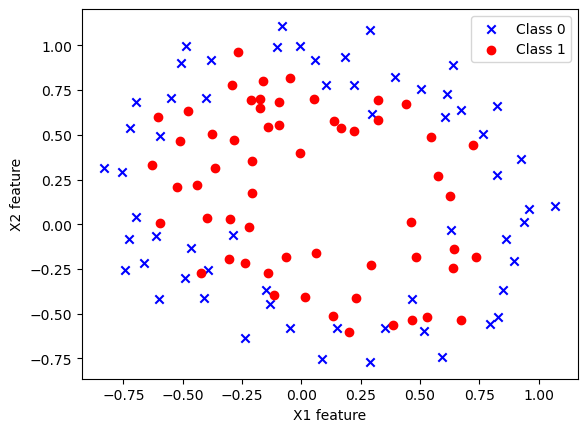

In [15]:
plt.scatter(XclassA[['X1']],XclassA[['X2']], color='blue', marker='x', label='Class 0')
plt.scatter(XclassB[['X1']],XclassB[['X2']], color='red', marker='o', label='Class 1') 
plt.xlabel('X1 feature') 
plt.ylabel('X2 feature') 
plt.legend()
plt.show() 

## Train / Validation / Test split

In [16]:
data_train, data_test = train_test_split(data, test_size = 0.3, random_state = 4)
data_valid, data_test = train_test_split(data_test, test_size = 0.5, random_state = 4)

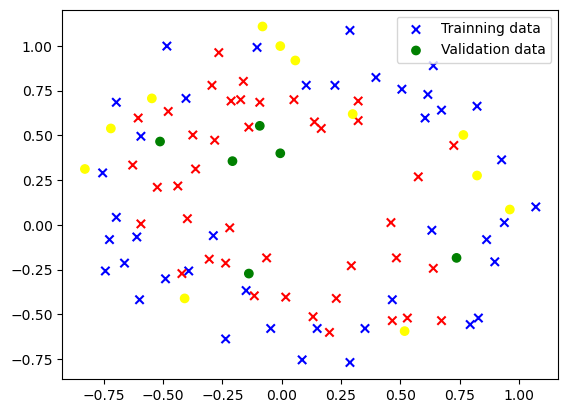

In [17]:
plt.scatter(data_train['X1'], data_train['X2'], c=['red' if x else 'blue' for x in data_train['Y']], label='Trainning data', marker='x')
plt.scatter(data_valid['X1'], data_valid['X2'], c=['green' if x else 'yellow' for x in data_valid['Y']], label='Validation data', marker='o')
plt.legend()

## Fitting a logistic regression model

In [20]:
data_train.iloc[:,0:2]

,X1,X2
98,-0.66302,-0.214180
88,-0.69758,0.041667
11,-0.11578,-0.396930
4,0.22984,-0.411550
65,0.82316,0.663010
...,...,...
104,0.10311,0.779970
1,-0.47869,0.633770
69,0.60426,0.597220
55,-0.60541,0.597220


In [21]:
lr_model = LogisticRegression().fit(data_train.iloc[:,0:2], data_train.Y)
# Parameters can be added to the 'LogisticRegression' call (we will see this later when we'll need)
# 2 parameters are given to the 'fit' function : 
#  - a dataset containing the features of the examples (here X1 and X2, the 2 first columns of the training set)
#  - a vector containing the labels (Y) of the examples (in the same order), 0 or 1 here

In [29]:
lr_model.intercept_

array([-0.00101679])

In [24]:
lr_model.coef_

array([[-0.43782068,  0.13900518]])

In [26]:
def sigmoid(z):
    return 1. / (1 + np.exp(-z))

def z(theta, x):
    #assert theta.shape[1] == 1
    #assert theta.shape[0] == x.shape[1]  # Theta should have as many rows as x has features.
    return np.dot(x, theta)
def hypothesis(theta, x):
    return sigmoid(z(theta, x))

In [40]:
thetas = lr_model.coef_[0]
thetas = np.append(lr_model.intercept_[0],thetas)
thetas

array([-0.00101679, -0.43782068,  0.13900518])

In [44]:
x = np.array([1])
x = np.append(x,data_train.iloc[0:1,0:2])

In [45]:
print(thetas)
print(x)

[-0.00101679 -0.43782068  0.13900518]
[ 1.      -0.66302 -0.21418]


In [46]:
hypothesis(thetas,x)

0.5645121347468917

In [50]:
data_train

,X1,X2,Y
98,-0.66302,-0.214180,0
88,-0.69758,0.041667,0
11,-0.11578,-0.396930,1
4,0.22984,-0.411550,1
65,0.82316,0.663010,0
...,...,...,...
104,0.10311,0.779970,0
1,-0.47869,0.633770,1
69,0.60426,0.597220,0
55,-0.60541,0.597220,1


In [51]:
lr_model.predict_proba(data_train.iloc[0:1,0:2])
# actually this command gives you the two probabilities : P(Y = 0 | X1, X2) and P(Y = 1 | X1, X2)
# You should obtain the same probability than the one calculated above

array([[0.43548787, 0.56451213]])

In [52]:
# The final decision of the model can be obtained by the command:
res = lr_model.predict(data_train.iloc[0:1,0:2])
res[0]

1

In [55]:
lr_model.score(data_train.iloc[:,:-1], data_train.Y)

0.5609756097560976

In [56]:
lr_model.score(data_valid.iloc[:,:-1],data_valid.Y)

0.5555555555555556

## Visualization of the decision boundary

In [57]:
def draw_boundary(model, data, deg, x_min, x_max, y_min, y_max):
    h = 0.05
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    zz = np.c_[xx.ravel(), yy.ravel()]
    zz = pd.DataFrame(zz)
    if(deg>1):
        poly = PolynomialFeatures(degree = deg)
        zz2 = poly.fit_transform(zz)
        zz2 = pd.DataFrame(zz2)
    else:
        zz2 = zz
    pred_zz= pd.Series(model.predict(zz2))
    color_map = matplotlib.colors.ListedColormap(pd.Series(['blue', 'red']))
    fig = plt.figure(figsize=  (8,8))
    fig = plt.scatter(zz.iloc[:,0], zz.iloc[:,1], c = pred_zz, cmap = color_map, marker='+')
    fig = plt.scatter(data.iloc[:,0], data.iloc[:,1], s = 50, c = data.iloc[:,2], cmap = color_map)
    

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


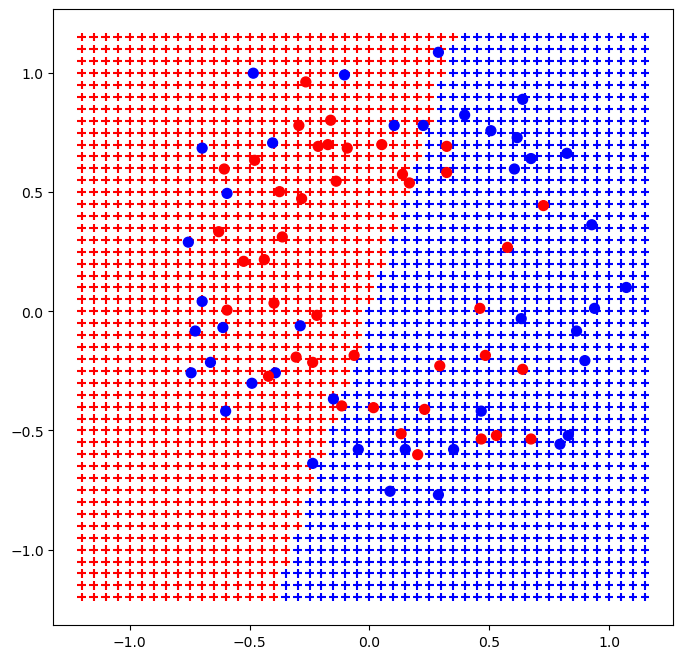

In [58]:
draw_boundary(lr_model, data_train, deg=1, x_min=-1.2, x_max=1.2,y_min= -1.2,y_max= 1.2)

In [59]:
poly = PolynomialFeatures(degree = 2) # Here we create an object that will be used to add polynomial features.
# The degree of the features can be modified in the parameters
X_train2 = poly.fit_transform(data_train.iloc[:,:-1]) # Here we use the 'poly' created above to add polynomial
# features of degree 2 to the training set
# It creates 4 new columns : 
# - one with 'ones' everywhere
# - one with X1^2
# - one with X2^2
# - one with X1*X2


In [60]:
print(type(X_train2))
X_train2.shape

<class 'numpy.ndarray'>


(82, 6)

In [61]:
lr_model2 = LogisticRegression().fit(X_train2, data_train.Y)

In [62]:
lr_model2.score(X_train2,data_train.Y)

0.7926829268292683

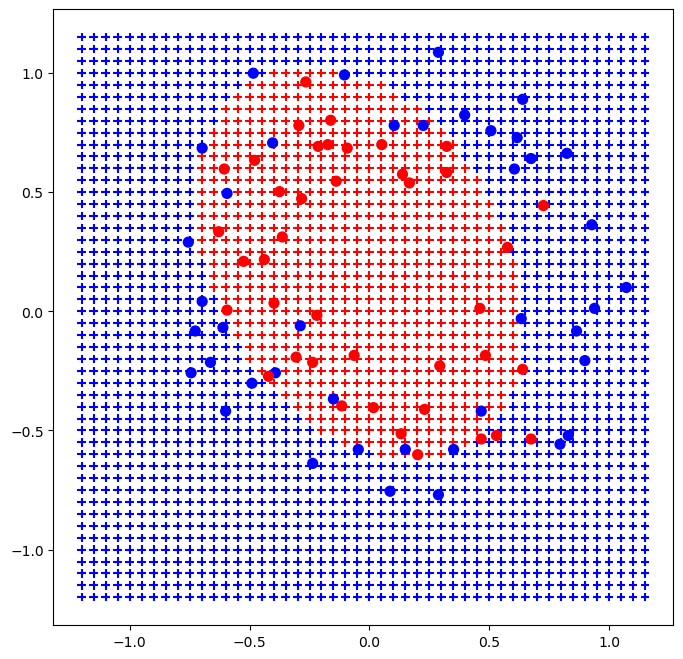

In [63]:
draw_boundary(lr_model2,data_train, deg=2, x_min=-1.2, x_max=1.2,y_min= -1.2,y_max= 1.2)

In [64]:
poly = PolynomialFeatures(degree = 2) # Here we create an object that will be used to add polynomial features.
# The degree of the features can be modified in the parameters
X_val2 = poly.fit_transform(data_valid.iloc[:,:-1]) # Here we use the 'poly' created above to add polynomial
# features of degree 2 to the training set
# It creates 4 new columns : 
# - one with 'ones' everywhere
# - one with X1^2
# - one with X2^2
# - one with X1*X2

In [65]:
lr_model2.score(X_val2,data_valid.Y)

0.7222222222222222

In [66]:
poly = PolynomialFeatures(degree=3)
X_train3 = poly.fit_transform(data_train.iloc[:,:-1]) # Here we use the 'poly' created above to add polynomial

In [67]:
lr_model3 = LogisticRegression().fit(X_train3, data_train.Y)

In [68]:
lr_model3.score(X_train3,data_train.Y)

0.7804878048780488

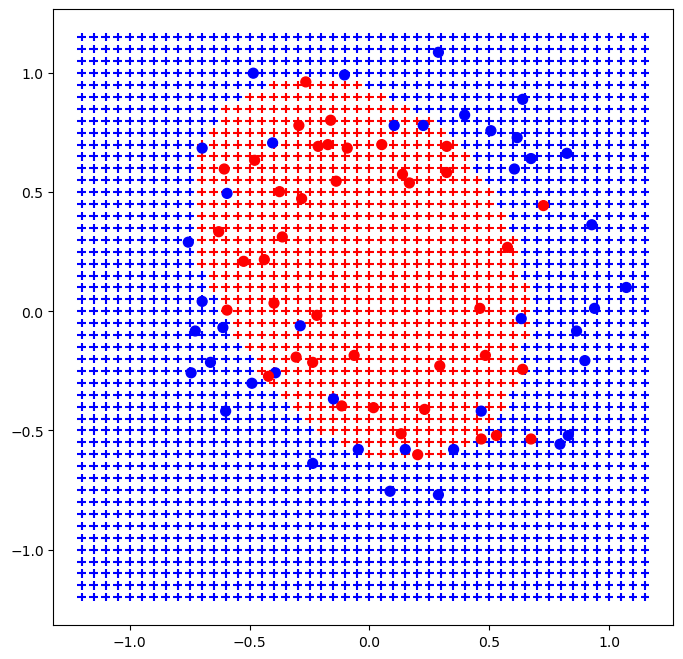

In [69]:
draw_boundary(lr_model3,data_train, deg=3, x_min=-1.2, x_max=1.2,y_min= -1.2,y_max= 1.2)

In [72]:
poly = PolynomialFeatures(degree = 3) # Here we create an object that will be used to add polynomial features.
# The degree of the features can be modified in the parameters
X_val3 = poly.fit_transform(data_valid.iloc[:,:-1]) # Here we use the 'poly' created above to add polynomial
# features of degree 2 to the training set
# It creates 4 new columns : 
# - one with 'ones' everywhere
# - one with X1^2
# - one with X2^2
# - one with X1*X2
lr_model3.score(X_val3,data_valid.Y)

0.7777777777777778

In [73]:
poly = PolynomialFeatures(degree = 3) # Here we create an object that will be used to add polynomial features.
# The degree of the features can be modified in the parameters
X_test3 = poly.fit_transform(data_test.iloc[:,:-1]) # Here we use the 'poly' created above to add polynomial
# features of degree 2 to the training set
# It creates 4 new columns : 
# - one with 'ones' everywhere
# - one with X1^2
# - one with X2^2
# - one with X1*X2
lr_model3.score(X_test3, data_test.Y)

0.6666666666666666

#  Exercice 2 : Multi-class classification

In [453]:
# Load the data. 
segment = pd.read_csv("segment.txt", sep = ' ')
segment

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,y
0,218,178,9,0.111111,0.0,0.833333,0.547722,1.111109,0.544331,59.629630,52.444443,75.222220,51.222220,-21.555555,46.777780,-25.222221,75.222220,0.318996,-2.040554,6
1,113,130,9,0.000000,0.0,0.277778,0.250924,0.333333,0.365148,0.888889,0.000000,2.555556,0.111111,-2.666667,5.000000,-2.333333,2.555556,1.000000,-2.123254,3
2,202,41,9,0.000000,0.0,0.944448,0.772202,1.111112,1.025597,123.037040,111.888885,139.777790,117.444440,-33.444443,50.222220,-16.777779,139.777790,0.199347,-2.299918,2
3,32,173,9,0.000000,0.0,1.722222,1.781593,9.000000,6.749488,43.592594,39.555557,52.888890,38.333336,-12.111111,27.888890,-15.777778,52.888890,0.266914,-1.998857,6
4,61,197,9,0.000000,0.0,1.444444,1.515353,2.611111,1.925463,49.592594,44.222220,61.555557,43.000000,-16.111110,35.888890,-19.777779,61.555557,0.302925,-2.022274,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,30,102,9,0.000000,0.0,1.222222,0.118518,1.333333,0.800000,20.259260,20.333334,25.000000,15.444445,0.222222,14.222222,-14.444445,25.000000,0.381059,-1.555097,1
2306,143,24,9,0.000000,0.0,1.277777,0.907406,0.888888,1.140749,127.629630,117.666664,141.666670,123.555560,-29.888890,42.111110,-12.222222,141.666670,0.169397,-2.349252,2
2307,80,72,9,0.000000,0.0,1.222223,1.003697,1.444444,1.167461,59.000000,51.333332,74.444440,51.222220,-23.000000,46.333332,-23.333334,74.444440,0.314606,-2.090221,4
2308,98,133,9,0.000000,0.0,0.555555,0.172133,0.388889,0.327731,0.962963,0.000000,2.777778,0.111111,-2.888889,5.444445,-2.555556,2.777778,1.000000,-2.123254,3


In [536]:
# It is adviced to "standardize" the features before applying a logistic regression model. Santardize means
# transforming each feature so that the mean of each feature is 0 and the standard deviation 1.
# This can be done by the following commands
X_segment = segment.iloc[:,0:19] # X_segment contains the features
y_segment = segment.y # y_segment contains the class
scaler = preprocessing.StandardScaler().fit(X_segment) # Standard Scaler is the command to standardize
X_segment = scaler.transform(X_segment)
X_segment = pd.DataFrame(X_segment)
# Now the features are standardized inside the table X_segment
data_segment = X_segment
data_segment['y'] = y_segment
# data_segment contains the features (standardized) and the class (column 'y')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,y
0,1.276189,0.949736,0.0,2.410668,-0.194552,-0.393061,-0.115120,-0.363952,-0.130944,0.591541,0.560194,0.713137,0.469694,-0.765448,1.296477,-1.429046,0.701072,-0.472692,-0.438613,6
1,-0.163336,0.114538,0.0,-0.357047,-0.194552,-0.598950,-0.121739,-0.579444,-0.133992,-0.947458,-0.936970,-0.956668,-0.936122,0.865568,-0.838573,0.552826,-0.992297,2.510764,-0.492140,3
2,1.056833,-1.434058,0.0,-0.357047,-0.194552,-0.351882,-0.110113,-0.363952,-0.122759,2.252806,2.257191,2.196558,2.291143,-1.792029,1.472505,-0.697870,2.205427,-0.996873,-0.606486,2
3,-1.273827,0.862737,0.0,-0.357047,-0.194552,-0.063639,-0.087601,1.821758,-0.025412,0.171373,0.192247,0.199940,0.115184,0.050060,0.331162,-0.611283,0.180633,-0.700863,-0.411625,6
4,-0.876244,1.280336,0.0,-0.357047,-0.194552,-0.166583,-0.093539,0.051641,-0.107455,0.328572,0.325469,0.399091,0.243541,-0.295331,0.740001,-0.957630,0.382595,-0.543102,-0.426781,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,-1.301246,-0.372660,0.0,-0.357047,-0.194552,-0.248939,-0.124692,-0.302383,-0.126596,-0.439957,-0.356502,-0.440918,-0.514377,1.115018,-0.367272,-0.495834,-0.469268,-0.200795,-0.124401,1
2306,0.247957,-1.729857,0.0,-0.357047,-0.194552,-0.228350,-0.107098,-0.425521,-0.120801,2.373132,2.422133,2.239963,2.459229,-1.485014,1.057988,-0.303420,2.249444,-1.128082,-0.638417,2
2307,-0.615758,-0.894659,0.0,-0.357047,-0.194552,-0.248939,-0.104950,-0.271598,-0.120347,0.575045,0.528474,0.695265,0.469694,-0.890173,1.273764,-1.265493,0.682948,-0.491924,-0.470760,4
2308,-0.368982,0.166738,0.0,-0.357047,-0.194552,-0.496006,-0.123497,-0.564052,-0.134628,-0.945517,-0.936970,-0.951562,-0.936122,0.846380,-0.815860,0.533584,-0.987118,2.510764,-0.492140,3


In [539]:
mc_model = LogisticRegression(multi_class='multinomial').fit(train_data.iloc[:,0:19], train_data.y)

/Users/smalinow/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [545]:
mc_model = LogisticRegression(multi_class='multinomial', max_iter=1000).fit(train_data.iloc[:,0:19], train_data.y)
# Now it should converge